In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib



In [3]:
# Load training features (X_train) and labels (y_train) from CSV files
X_train = pd.read_csv('./preprocessed/X_train_res.csv')
y_train = pd.read_csv('./preprocessed/y_train_res.csv')

# Load testing features (X_test) and labels (y_test) from CSV files
X_test = pd.read_csv('./preprocessed/X_test.csv')
y_test = pd.read_csv('./preprocessed/y_test.csv')

In [4]:
X_train.shape

(35077436, 18)

In [5]:
# Create the Logistic Regression model
logreg_model = LogisticRegression(max_iter=20000, verbose=1)  # max_iter to ensure convergence for complex data

# Train the model
logreg_model.fit(X_train, y_train.values.ravel())  # Flatten y_train if it's a DataFrame

# Save the trained model to a file
joblib.dump(logreg_model, 'logreg_model.pkl')
print("Model saved to 'logreg_model.pkl'")

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43138D+07    |proj g|=  1.48056D+09


 This problem is unconstrained.



At iterate   50    f=  2.23255D+07    |proj g|=  3.42813D+07

At iterate  100    f=  2.20237D+07    |proj g|=  1.50058D+07

At iterate  150    f=  2.07200D+07    |proj g|=  1.33997D+08

At iterate  200    f=  1.89138D+07    |proj g|=  5.41568D+07

At iterate  250    f=  1.68843D+07    |proj g|=  9.16573D+07

At iterate  300    f=  1.50404D+07    |proj g|=  8.53694D+07

At iterate  350    f=  1.37582D+07    |proj g|=  4.26869D+07

At iterate  400    f=  1.32185D+07    |proj g|=  8.42665D+06

At iterate  450    f=  1.31120D+07    |proj g|=  1.74752D+07

At iterate  500    f=  1.30677D+07    |proj g|=  8.74994D+07

At iterate  550    f=  1.30226D+07    |proj g|=  6.97619D+06

At iterate  600    f=  1.30210D+07    |proj g|=  1.39179D+06

At iterate  650    f=  1.30185D+07    |proj g|=  3.12063D+06

At iterate  700    f=  1.30040D+07    |proj g|=  4.96289D+06

At iterate  750    f=  1.29419D+07    |proj g|=  6.44772D+07

At iterate  800    f=  1.28452D+07    |proj g|=  4.73519D+06

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 53.3min finished


Accuracy: 93.32%


## Quantitative Metrics

In [10]:
y_test_pd = pd.Series(y_pred)
y_test_pd.to_csv('./preprocessed/y_pred_lr.csv', index=False) 
print("Saved y_pred - Logistic Regression")

Saved y_pred - Logistic Regression


[[32802412   723542]
 [ 2019959  5496631]]


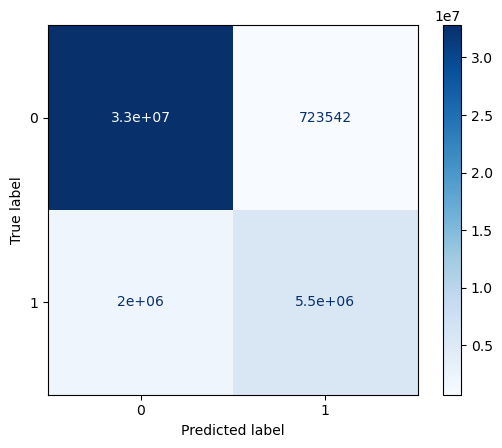

In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_model.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the colormap to something else if you like
plt.show()


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96  33525954
           1       0.88      0.73      0.80   7516590

    accuracy                           0.93  41042544
   macro avg       0.91      0.85      0.88  41042544
weighted avg       0.93      0.93      0.93  41042544



In [15]:
loaded_model = joblib.load('logreg_model.pkl')

## Precision-Recall Curve

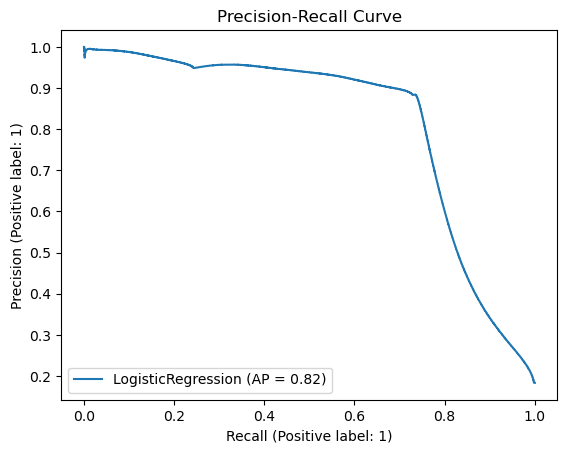

In [17]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(loaded_model, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

## ROC Curve

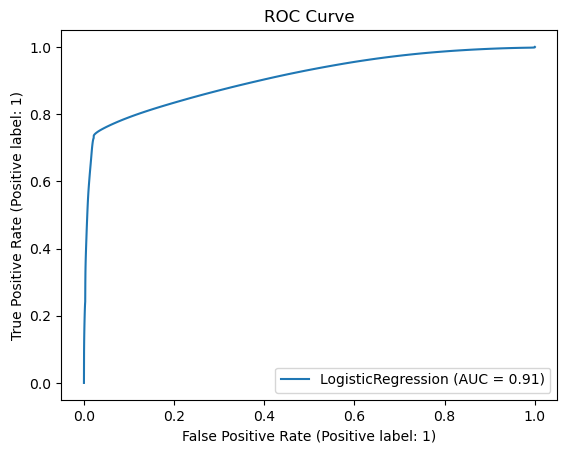

In [18]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(loaded_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

## Feature Importance

LATE_AIRCRAFT_DELAY: 5.0070
WEATHER_DELAY: 4.4944
CARRIER_DELAY: 3.9455
SECURITY_DELAY: 0.3707
CANCELLED: 0.1809
QUARTER: -0.1180
NAS_DELAY: -0.0807
MONTH: 0.0239
DAY_OF_WEEK: 0.0056
OP_CARRIER_AIRLINE_ID: -0.0043
DEP_TIME: 0.0034
CRS_DEP_TIME: -0.0021
YEAR: -0.0008
DEST_CITY_MARKET_ID: -0.0006
ORIGIN_CITY_MARKET_ID: -0.0006
DAY_OF_MONTH: 0.0003
DEST_AIRPORT_SEQ_ID: 0.0001
ORIGIN_AIRPORT_SEQ_ID: 0.0000


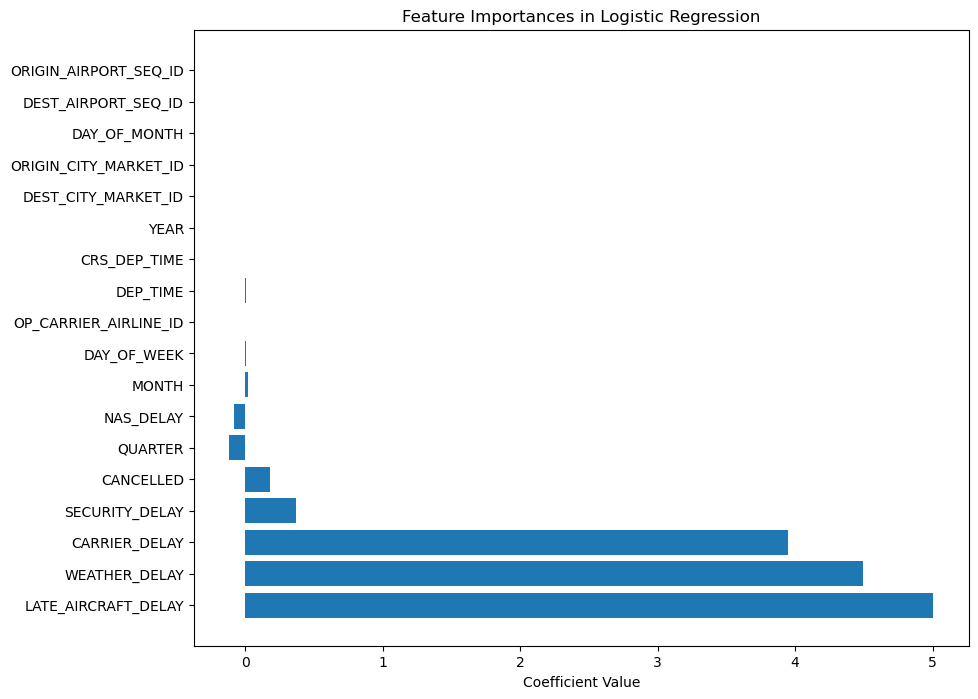

In [22]:
coefficients = loaded_model.coef_[0]
feature_names = X_train.columns  # If you're using a DataFrame

# Create a dictionary of features and their importances
feature_importance = dict(zip(feature_names, coefficients))

# Sort features by absolute value of coefficients
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Print sorted feature importances
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")

# Optional: Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh([feature for feature, _ in sorted_features], [coef for _, coef in sorted_features])
plt.xlabel("Coefficient Value")
plt.title("Feature Importances in Logistic Regression")
plt.show()

In [ ]:
#--------------ONLY FOR LOADING MODEL DO NOT RUN------------------------#
# Load the saved model from the file
loaded_model = joblib.load('logreg_model.pkl')

# Make predictions with the loaded model
loaded_model_predictions = loaded_model.predict(X_test)
loaded_model_accuracy = accuracy_score(y_test, loaded_model_predictions)
print(f'Loaded model accuracy: {loaded_model_accuracy * 100:.2f}%')